# Vaccination in the UK

Import libraries

In [1]:
# work with dataframes
import pandas as pd
# work with dates
import datetime as dt
# explore datasets
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
# build a model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# split the dataset
from sklearn.model_selection import train_test_split
# evaluate the model
from sklearn.metrics import mean_absolute_error
# graph data
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_text

## Step 0: Read the dataset

Read csv-file

In [2]:
path = "/Users/travel_mechtal/Documents/UWE/Portfolio/"
data=pd.read_csv(path + "region_2022-01-27.csv", index_col="date", parse_dates=True)

Look at the five first rows of the dataset

In [3]:
data.head()

,areaCode,areaName,areaType,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate
date,,,,,,
2022-01-26,E12000009,South West,region,986,2520,4034.0
2022-01-25,E12000009,South West,region,899,1845,4283.0
2022-01-24,E12000009,South West,region,723,1445,3441.0
2022-01-23,E12000009,South West,region,1035,3007,3439.0
2022-01-22,E12000009,South West,region,1822,4709,5896.0


Drop unnecessary columns

In [4]:
dataset = data.drop(["areaCode", "areaName", "areaType"], axis=1)

Rename columns

In [5]:
dataset = dataset.rename(columns={"newPeopleVaccinatedFirstDoseByVaccinationDate":"First", 
                                  "newPeopleVaccinatedSecondDoseByVaccinationDate":"Second", 
                                  "newPeopleVaccinatedThirdInjectionByVaccinationDate":"Third"})

Replace Na values

In [7]:
dataset = dataset.fillna(0)

Look at the final version of the dataset

In [8]:
dataset.head()

,First,Second,Third
date,,,
2022-01-26,986,2520,4034.0
2022-01-25,899,1845,4283.0
2022-01-24,723,1445,3441.0
2022-01-23,1035,3007,3439.0
2022-01-22,1822,4709,5896.0


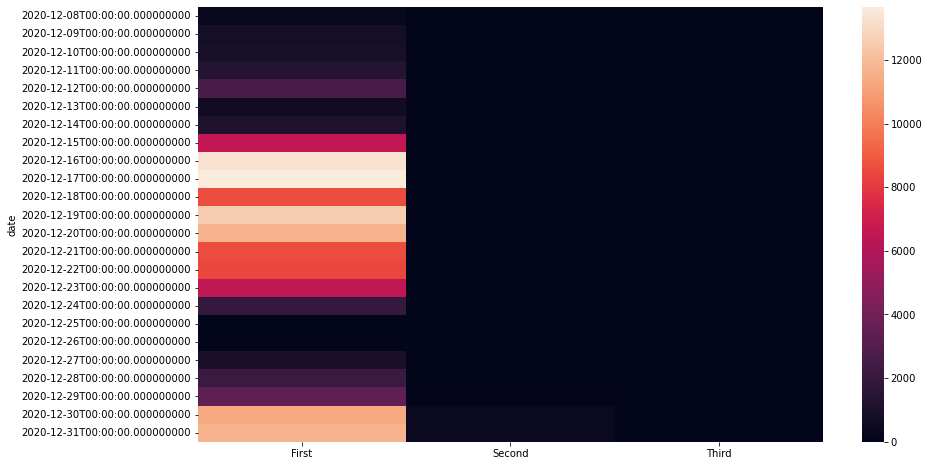

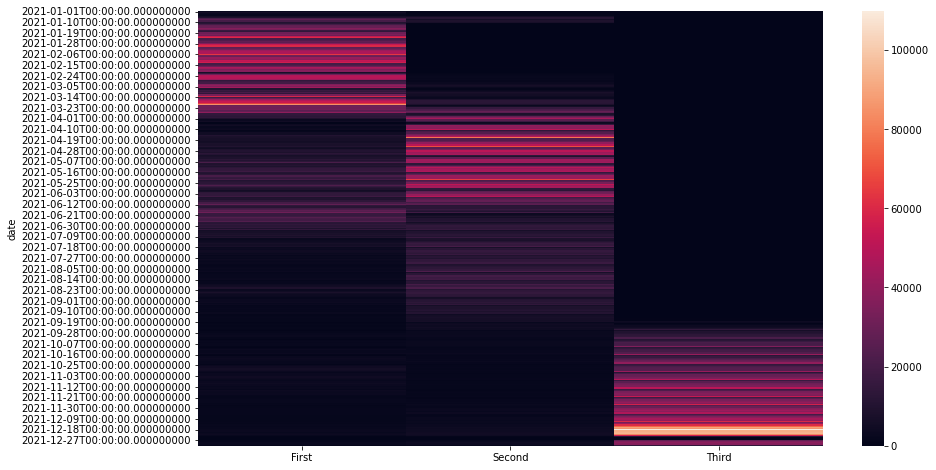

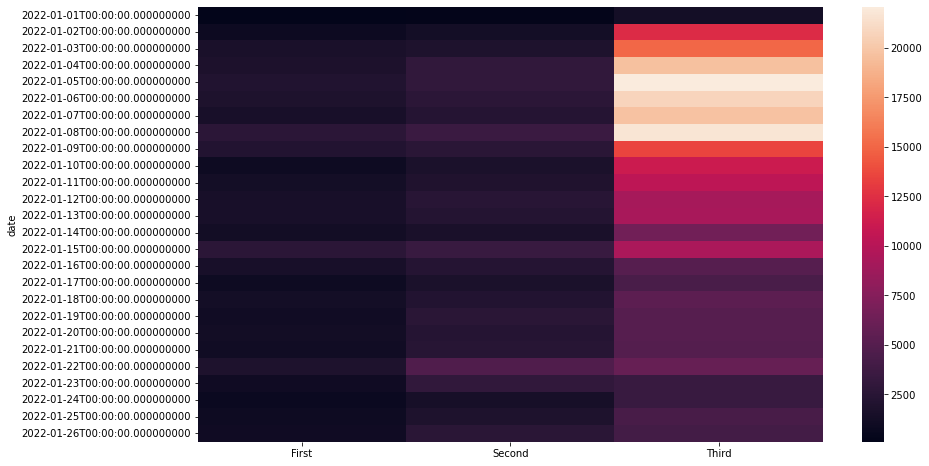

In [9]:
for year in [2020,2021,2022]:
    plt.figure(figsize=(14,8))
    sns.heatmap(data=dataset.loc[[date for date in dataset.index if date.year==year],:].sort_index())

## Step 1: Work with dates. Engineer Datatime Features

Get features:
1) Year
2) Month
3) Day
etc.

In [10]:
dataset['Year'] = dataset.index.year

In [11]:
dataset['Month'] = dataset.index.month

In [12]:
dataset['Day'] = dataset.index.day

In [13]:
dataset['DayOfYear'] = dataset.index.dayofyear

In [14]:
dataset['WeekOfYear'] = dataset.index.weekofyear

/var/folders/gf/5d3ljzjd5tj4xmg688lrs9j40000gn/T/ipykernel_55890/4046694508.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dataset['WeekOfYear'] = dataset.index.weekofyear


In [15]:
dataset['Weekday'] = dataset.index.weekday

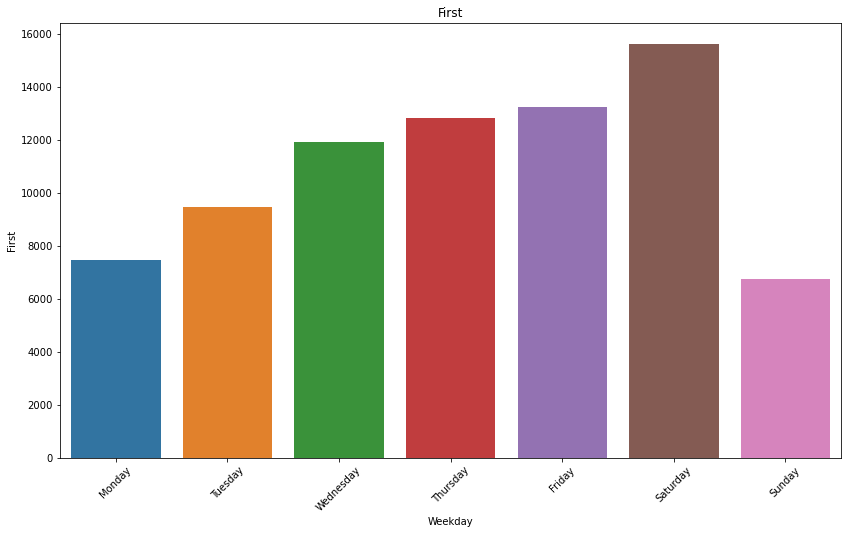

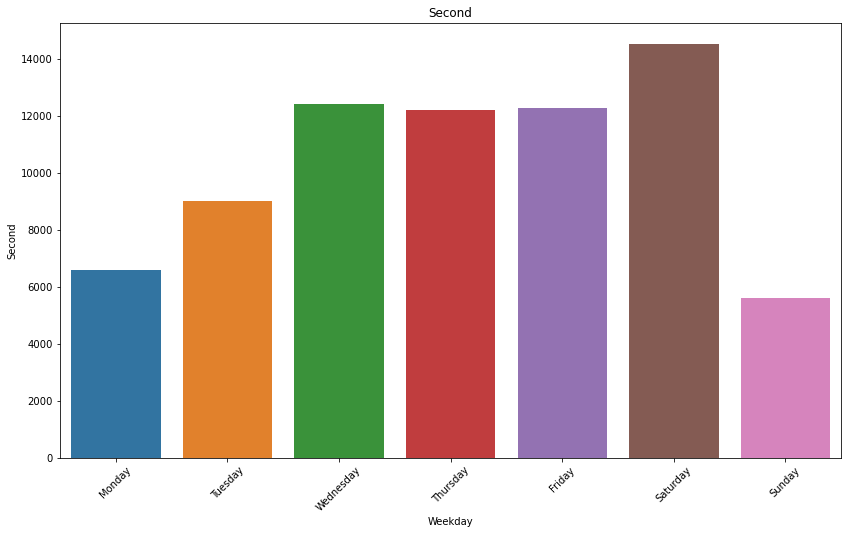

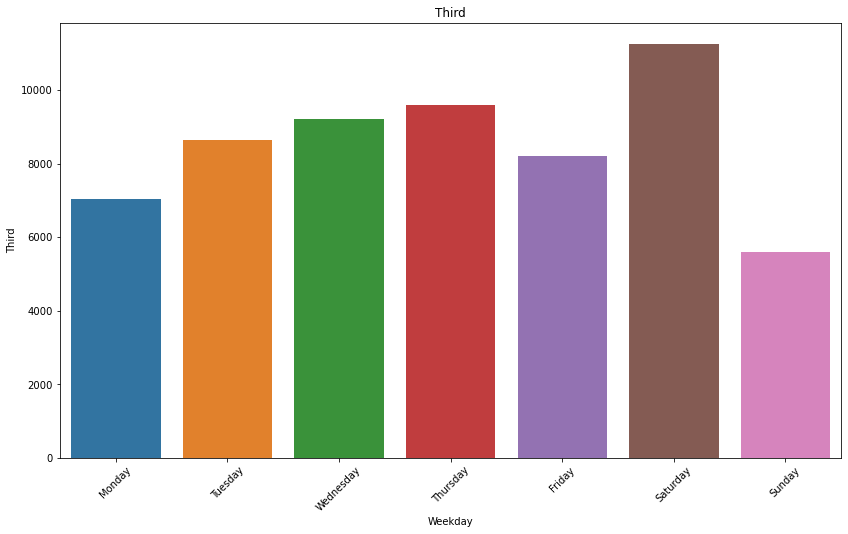

In [16]:
weekdays = {0: 'Monday', 
            1: 'Tuesday',
            2: 'Wednesday',
            3: 'Thursday',
            4: 'Friday',
            5: 'Saturday',
            6: 'Sunday'}




for dose in ["First", "Second", "Third"]:
    weekday_mean = dataset.groupby('Weekday')[dose].mean()
    weekday_mean = weekday_mean.rename(index=weekdays)
    plt.figure(figsize=(14,8))
    plt.title(dose)
    sns.barplot(x=weekday_mean.index, y=weekday_mean)
    plt.xticks(rotation=45)

In [17]:
dataset['Quarter'] = dataset.index.quarter

In [18]:
dataset['IsMonthStart'] = dataset.index.is_month_start

In [19]:
dataset['IsMonthEnd'] = dataset.index.is_month_end

Look at the dataset with new features

In [20]:
dataset.head()

,First,Second,Third,Year,Month,Day,DayOfYear,WeekOfYear,Weekday,Quarter,IsMonthStart,IsMonthEnd
date,,,,,,,,,,,,
2022-01-26,986,2520,4034.0,2022,1,26,26,4,2,1,False,False
2022-01-25,899,1845,4283.0,2022,1,25,25,4,1,1,False,False
2022-01-24,723,1445,3441.0,2022,1,24,24,4,0,1,False,False
2022-01-23,1035,3007,3439.0,2022,1,23,23,3,6,1,False,False
2022-01-22,1822,4709,5896.0,2022,1,22,22,3,5,1,False,False


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 415 entries, 2022-01-26 to 2020-12-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First         415 non-null    int64  
 1   Second        415 non-null    int64  
 2   Third         415 non-null    float64
 3   Year          415 non-null    int64  
 4   Month         415 non-null    int64  
 5   Day           415 non-null    int64  
 6   DayOfYear     415 non-null    int64  
 7   WeekOfYear    415 non-null    int64  
 8   Weekday       415 non-null    int64  
 9   Quarter       415 non-null    int64  
 10  IsMonthStart  415 non-null    bool   
 11  IsMonthEnd    415 non-null    bool   
dtypes: bool(2), float64(1), int64(9)
memory usage: 52.6 KB


**What is about Missing values? 
For example, there may be only one dose per day.**

## Step 2: Explore the dataset

In [22]:
profile = ProfileReport(dataset)

In [23]:
profile.to_file("DatasetRegion.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Step 3: Split sets, train a Machine Learning Model and Evaluate performance

Define necessary variables

In [24]:
feature_columns = ["Year", "Month", "Day", "Weekday", "IsMonthStart", "IsMonthEnd"]
y_list = ["First", "Second"]
model_list = ["DecisionTree", "RandomForest"]
estimators_list = [100,200,300,400,500]
results = {}
val_sets = {}

Prepare sets

In [25]:
def prepare_sets(dataset, feature_columns, y_column):
    train_X, val_X, train_y, val_y = train_test_split(dataset[feature_columns], dataset[y_column], random_state=1)
    return train_X, val_X, train_y, val_y

Train and evaluate the model

In [26]:
def train_model(train_X, val_X, train_y, val_y, model_type, n_estimators=None):
    if model_type == "DecisionTree":
        model = DecisionTreeRegressor(random_state=1)
    elif model_type == "RandomForest":
        model = RandomForestRegressor(random_state=1, n_estimators=n_estimators)
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    return mae, predictions, model

Train models using parameters

In [27]:
for y in y_list:
    train_X, val_X, train_y, val_y = prepare_sets(dataset, feature_columns, y)
    val_sets[(y, "val_X")] = val_X
    val_sets[(y, "val_y")] = val_y
    for model in model_list:
        if model != "RandomForest":
            results[(y,model,"mae", 0)], results[(y,model,"predictions", 0)], results[(y,model,"model", 0)] = train_model(train_X, val_X, train_y, val_y, model, n_estimators=None)
        else:
            for n in estimators_list:
                results[(y,model,"mae", n)], results[(y,model,"predictions", n)], results[(y,model,"model", n)] = train_model(train_X, val_X, train_y, val_y, model, n)

Show results

In [28]:
for res in results.keys():
    column, model, measure, treecount = res
    if measure == "mae":
        print(res, "Result: ", 1 - results[res]/dataset[column].mean())

('First', 'DecisionTree', 'mae', 0) Result:  0.6437087212771292
('First', 'RandomForest', 'mae', 100) Result:  0.751618587539483
('First', 'RandomForest', 'mae', 200) Result:  0.75634355378726
('First', 'RandomForest', 'mae', 300) Result:  0.7542008733902813
('First', 'RandomForest', 'mae', 400) Result:  0.7550162219639709
('First', 'RandomForest', 'mae', 500) Result:  0.754843479613817
('Second', 'DecisionTree', 'mae', 0) Result:  0.706121636338128
('Second', 'RandomForest', 'mae', 100) Result:  0.7715985048182643
('Second', 'RandomForest', 'mae', 200) Result:  0.776153470596447
('Second', 'RandomForest', 'mae', 300) Result:  0.7765567227604535
('Second', 'RandomForest', 'mae', 400) Result:  0.7751089448055306
('Second', 'RandomForest', 'mae', 500) Result:  0.7738541991708733


Look at the tree

In [29]:
# feature_columns is defined above
for y in y_list:
    for model in model_list:
        if model == "RandomForest":
            # one of the tree
            print('\n Dose:{}, Model:{} \n'.format(y, model))
            r = export_text(results[("First", "RandomForest", "model", 500)].estimators_[0], feature_names=feature_columns)
            print(r)
        else:
            print('\n Dose:{}, Model:{} \n'.format(y, model))
            r = export_text(results[(y, model, "model", 0)], feature_names=feature_columns)
            print(r)


 Dose:First, Model:DecisionTree 

|--- Month <= 3.50
|   |--- Year <= 2021.50
|   |   |--- Weekday <= 1.50
|   |   |   |--- Month <= 1.50
|   |   |   |   |--- Day <= 15.00
|   |   |   |   |   |--- Day <= 8.00
|   |   |   |   |   |   |--- Weekday <= 0.50
|   |   |   |   |   |   |   |--- value: [2501.00]
|   |   |   |   |   |   |--- Weekday >  0.50
|   |   |   |   |   |   |   |--- value: [5622.00]
|   |   |   |   |   |--- Day >  8.00
|   |   |   |   |   |   |--- value: [11724.00]
|   |   |   |   |--- Day >  15.00
|   |   |   |   |   |--- Weekday <= 0.50
|   |   |   |   |   |   |--- value: [22795.00]
|   |   |   |   |   |--- Weekday >  0.50
|   |   |   |   |   |   |--- Day <= 22.50
|   |   |   |   |   |   |   |--- value: [30688.00]
|   |   |   |   |   |   |--- Day >  22.50
|   |   |   |   |   |   |   |--- value: [27718.00]
|   |   |   |--- Month >  1.50
|   |   |   |   |--- Day <= 26.00
|   |   |   |   |   |--- Day <= 15.50
|   |   |   |   |   |   |--- Month <= 2.50
|   |   |   |   |   |

[Text(558.0, 951.3000000000001, 'Month <= 3.5\nmse = 224125617.767\nsamples = 311\nvalue = 11579.476'),
 Text(279.0, 679.5, 'Year <= 2021.5\nmse = 402879792.781\nsamples = 85\nvalue = 27183.824'),
 Text(139.5, 407.70000000000005, 'Weekday <= 1.5\nmse = 280753979.413\nsamples = 67\nvalue = 34167.463'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'IsMonthStart <= 0.5\nmse = 199720.25\nsamples = 18\nvalue = 1189.167'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'Month <= 6.5\nmse = 30870945.951\nsamples = 226\nvalue = 5710.584'),
 Text(697.5, 407.70000000000005, 'Month <= 4.5\nmse = 36932647.606\nsamples = 69\nvalue = 11573.42'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 135.89999999999998, '\n  (...)  \n'),
 Text(976.5, 407.70000000000005, 'Month <= 7.5\nmse = 6461168.109\nsamples = 157\nvalue 

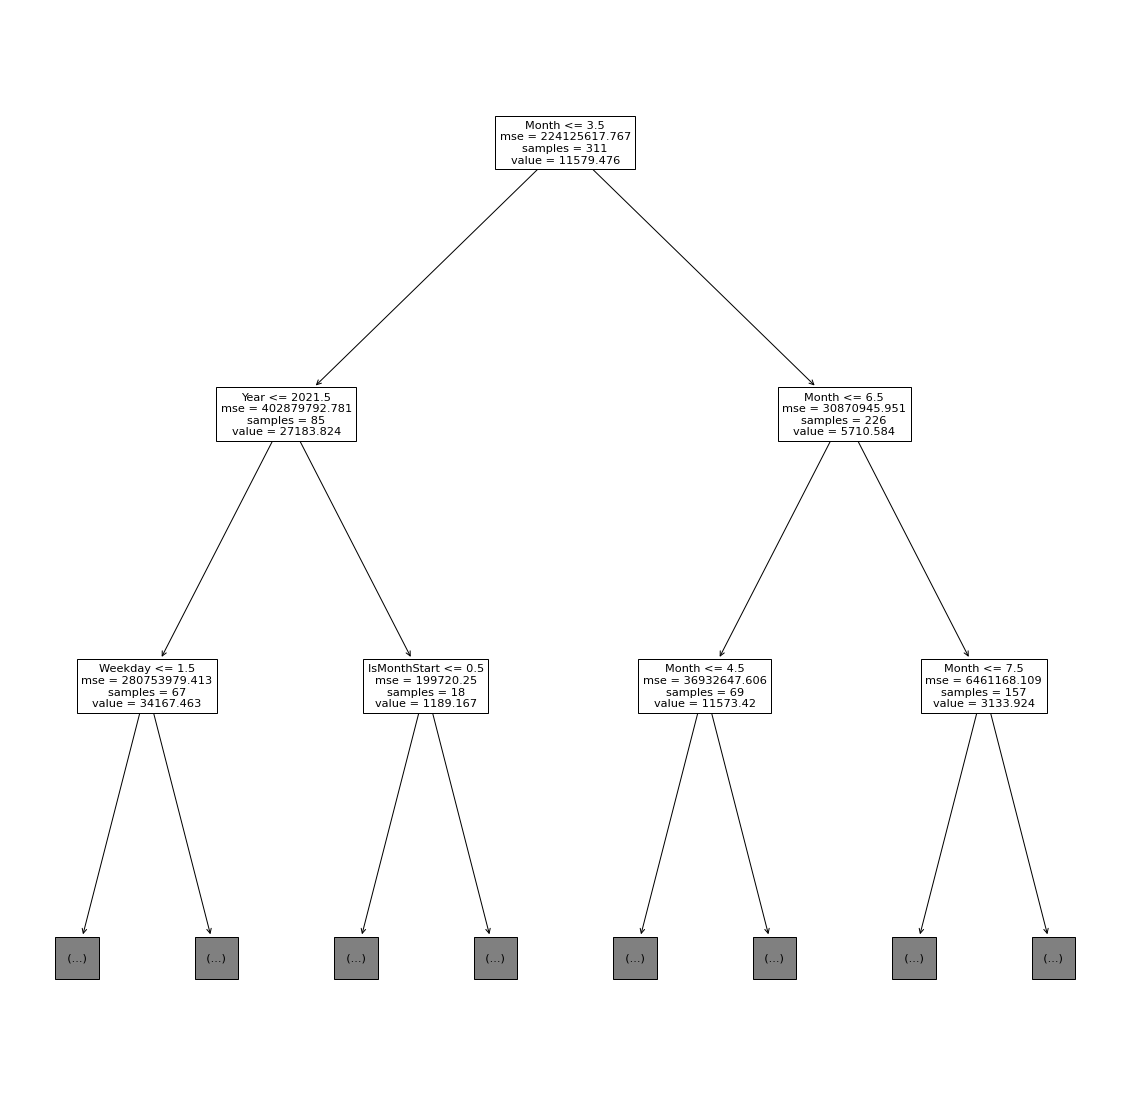

In [30]:
plt.figure(figsize=(20,20))
# feature_columns is defined above
tree.plot_tree(results[("First", "DecisionTree", "model", 0)], max_depth=2, feature_names=feature_columns)

[Text(558.0, 951.3000000000001, 'Month <= 3.5\nmse = 232906901.394\nsamples = 202\nvalue = 11789.338'),
 Text(279.0, 679.5, 'Year <= 2021.5\nmse = 440179119.329\nsamples = 54\nvalue = 27825.988'),
 Text(139.5, 407.70000000000005, 'Weekday <= 1.5\nmse = 280890357.651\nsamples = 40\nvalue = 36397.274'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'Day <= 3.0\nmse = 209341.5\nsamples = 14\nvalue = 1255.0'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'Month <= 6.5\nmse = 33623652.417\nsamples = 148\nvalue = 6046.956'),
 Text(697.5, 407.70000000000005, 'Month <= 5.5\nmse = 32151744.383\nsamples = 47\nvalue = 12475.562'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 135.89999999999998, '\n  (...)  \n'),
 Text(976.5, 407.70000000000005, 'Month <= 7.5\nmse = 5923915.146\nsamples = 101\nvalue = 3038.699'

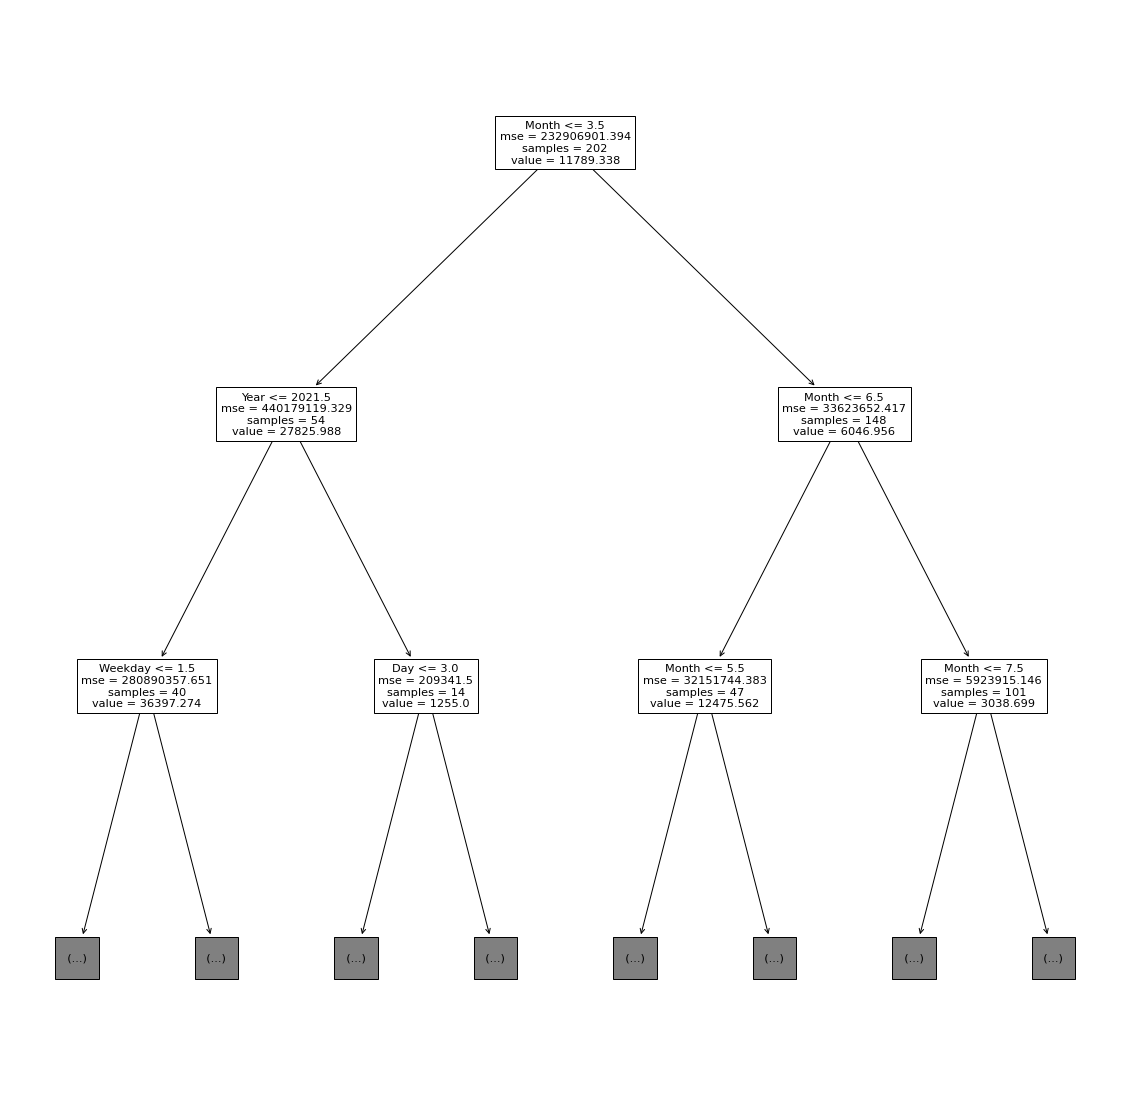

In [31]:
plt.figure(figsize=(20,20))
# feature_columns is defined above
tree.plot_tree(results[("First", "RandomForest", "model", 500)].estimators_[0], max_depth=2, feature_names=feature_columns)

In [32]:
for val in val_sets.keys():
    column, val_set = val
    if val_set == "val_y":
        print(val_sets[val])

date
2021-01-03     3067
2021-10-16     1261
2021-07-23     2964
2021-08-17     2420
2021-10-28     5791
              ...  
2021-08-15     1443
2021-06-12    27872
2021-12-18     2812
2021-05-10    10707
2021-07-25     2022
Name: First, Length: 104, dtype: int64
date
2021-01-03      582
2021-10-16     2233
2021-07-23    13165
2021-08-17    12100
2021-10-28     1582
              ...  
2021-08-15     9930
2021-06-12    26182
2021-12-18     3981
2021-05-10    20341
2021-07-25     9077
Name: Second, Length: 104, dtype: int64


## Step 4: Plot results

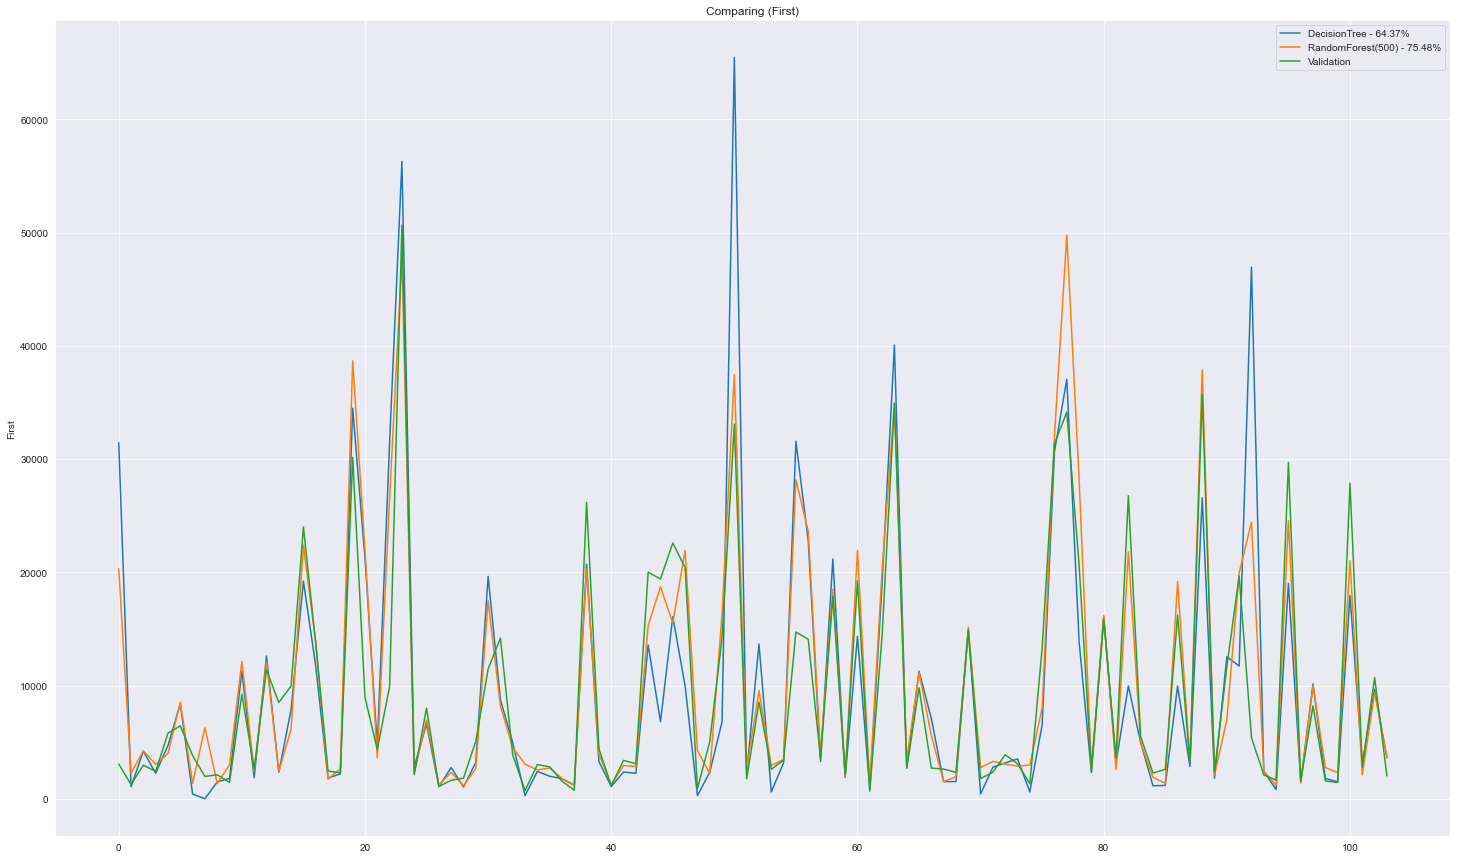

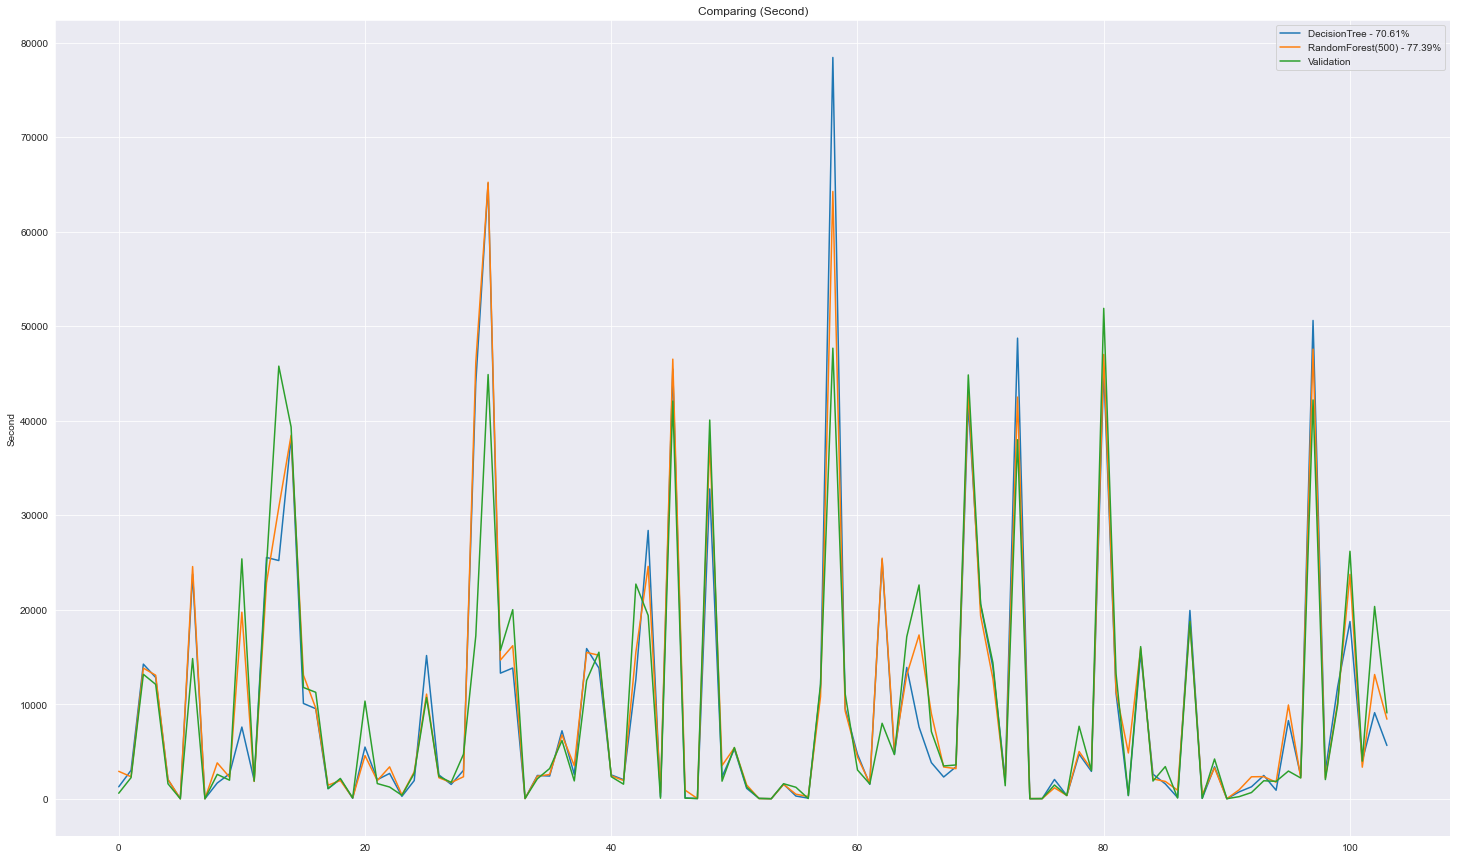

In [33]:
for y in y_list:
    # set size, style and title
    plt.figure(figsize=(25,15))
    sns.set_style("darkgrid")
    plt.title('{} ({})'.format("Comparing", y))
    # plot predictions
    for model in model_list:
        if model == "RandomForest":
            sns.lineplot(data=results[(y, model, "predictions", 500)], label = '{}({}) - {:.2%}'.format(model, 500, 1 - results[(y,model,"mae",500)]/dataset[y].mean()))
        else:
            sns.lineplot(data=results[(y, model, "predictions", 0)], label = '{} - {:.2%}'.format(model, 1 - results[(y,model,"mae",0)]/dataset[y].mean()))
    # plot validation set
    val_sets[(y, "val_y")].index=range(0,len(val_sets[(y, "val_y")]))
    sns.lineplot(data=val_sets[(y, "val_y")], label="Validation")
    # add legend
    plt.legend()

## Step 5: Improve models by changing the dataset

### Work with features

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 415 entries, 2022-01-26 to 2020-12-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First         415 non-null    int64  
 1   Second        415 non-null    int64  
 2   Third         415 non-null    float64
 3   Year          415 non-null    int64  
 4   Month         415 non-null    int64  
 5   Day           415 non-null    int64  
 6   DayOfYear     415 non-null    int64  
 7   WeekOfYear    415 non-null    int64  
 8   Weekday       415 non-null    int64  
 9   Quarter       415 non-null    int64  
 10  IsMonthStart  415 non-null    bool   
 11  IsMonthEnd    415 non-null    bool   
dtypes: bool(2), float64(1), int64(9)
memory usage: 52.6 KB


Define necessary variables

In [46]:
feature_columns = ["Weekday", "Year", "DayOfYear"]
y_list = ["First", "Second"]
model_list = ["DecisionTree", "RandomForest"]
estimators_list = [100,200,300,400,500]
results = {}
val_sets = {}

Prepare sets and Train models

In [47]:
for y in y_list:
    train_X, val_X, train_y, val_y = prepare_sets(dataset, feature_columns, y)
    val_sets[(y, "val_X")] = val_X
    val_sets[(y, "val_y")] = val_y
    for model in model_list:
        if model != "RandomForest":
            results[(y,model,"mae", 0)], results[(y,model,"predictions", 0)], results[(y,model,"model", 0)] = train_model(train_X, val_X, train_y, val_y, model, n_estimators=None)
        else:
            for n in estimators_list:
                results[(y,model,"mae", n)], results[(y,model,"predictions", n)], results[(y,model,"model", n)] = train_model(train_X, val_X, train_y, val_y, model, n)

Show results

In [48]:
for res in results.keys():
    column, model, measure, treecount = res
    if measure == "mae":
        print(res, "Result: ", 1 - results[res]/dataset[column].mean())

('First', 'DecisionTree', 'mae', 0) Result:  0.7248630326024768
('First', 'RandomForest', 'mae', 100) Result:  0.7662734316499331
('First', 'RandomForest', 'mae', 200) Result:  0.7831927047569076
('First', 'RandomForest', 'mae', 300) Result:  0.7824191915655171
('First', 'RandomForest', 'mae', 400) Result:  0.783001374743421
('First', 'RandomForest', 'mae', 500) Result:  0.7837038702898657
('Second', 'DecisionTree', 'mae', 0) Result:  0.7692636418171874
('Second', 'RandomForest', 'mae', 100) Result:  0.8341621784974336
('Second', 'RandomForest', 'mae', 200) Result:  0.8361849996061279
('Second', 'RandomForest', 'mae', 300) Result:  0.8365889071806888
('Second', 'RandomForest', 'mae', 400) Result:  0.8333133970971072
('Second', 'RandomForest', 'mae', 500) Result:  0.8318561653086721


A combination of the following features give us the best result:
* Weekday, 
* Year, 
* DayOfYear

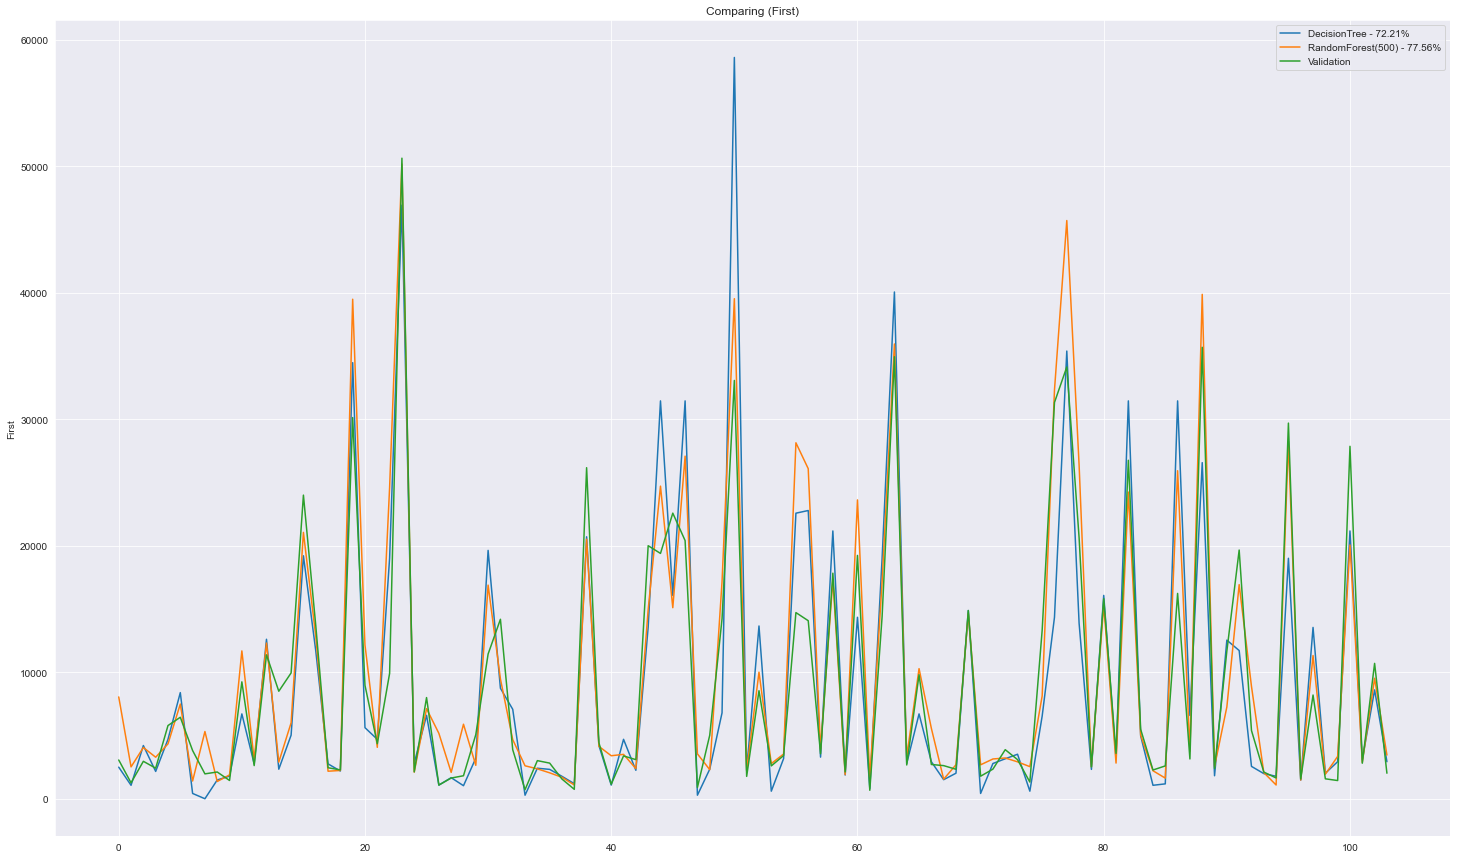

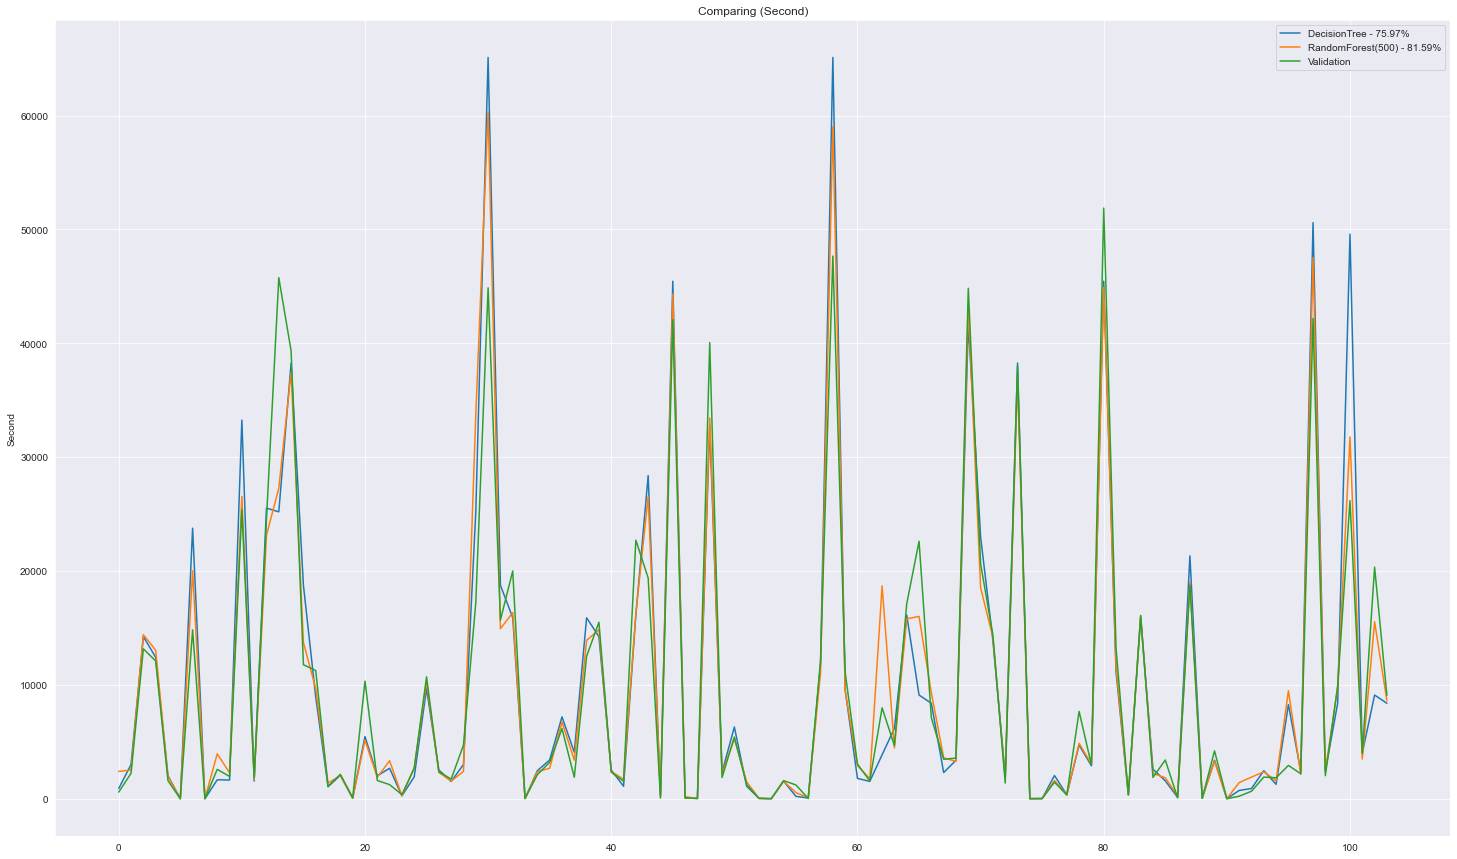

In [38]:
for y in y_list:
    # set size, style and title
    plt.figure(figsize=(25,15))
    sns.set_style("darkgrid")
    plt.title('{} ({})'.format("Comparing", y))
    # plot predictions
    for model in model_list:
        if model == "RandomForest":
            sns.lineplot(data=results[(y, model, "predictions", 500)], label = '{}({}) - {:.2%}'.format(model, 500, 1 - results[(y,model,"mae",500)]/dataset[y].mean()))
        else:
            sns.lineplot(data=results[(y, model, "predictions", 0)], label = '{} - {:.2%}'.format(model, 1 - results[(y,model,"mae",0)]/dataset[y].mean()))
    # plot validation set
    val_sets[(y, "val_y")].index=range(0,len(val_sets[(y, "val_y")]))
    sns.lineplot(data=val_sets[(y, "val_y")], label="Validation")
    # add legend
    plt.legend()

### Work with missing values

In [39]:
dataset.index.min()

Timestamp('2020-12-08 00:00:00')

In [40]:
dataset.index.max()

Timestamp('2022-01-26 00:00:00')

In [41]:
dates = pd.date_range(dataset.index.min(),dataset.index.max(),freq='d')

In [44]:
dates

DatetimeIndex(['2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17',
               ...
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26'],
              dtype='datetime64[ns]', length=415, freq='D')

In [42]:
len(dataset.index)

415

In [43]:
len(dates)

415

There are no missing dates.